# SMAD3

Pathogenic variants in SMAD3 are associated with [Loeys-Dietz syndrome 3 (LDS3)](https://omim.org/entry/613795).

SMAD3 is a direct mediator of transcriptional activation by the TGF-betaTGF-β receptor -  active TGF-β binds to TGFβRII, which recruits and activates TGFβRI through phosphorylated the GS domain in TGFβRI. TGFβRI phosphorylates and activates Smad2 and Smad3 (R-Smads).

LDS3 is  autosomal dominant syndromic form of thoracic aortic aneurysms and dissections characterised by the presence of arterial aneurysms and tortuosity, mild craniofacial, skeletal and cutaneous anomalies, and early-onset osteoarthritis. ([van der Laar et al., 2012](https://pubmed.ncbi.nlm.nih.gov/22167769/)).

We performed the following PubMed query on 2024-09-24

  
```bash
  (Loeys-Dietz syndrome type 3 OR LDS3 OR "Loeys-Dietz syndrome 3") AND (SMAD3 OR "SMAD3 variants" OR "SMAD3 mutations") AND ("genotype phenotype correlation"    OR " phenotype genotype correlation")
```
This query returned on article, [PMID:31915033](https://pubmed.ncbi.nlm.nih.gov/31915033/), which did not describe GPC analysis of variants specific to the SMAD3 gene.

In [1]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo(release='v2023-10-09')
print(f'Loaded HPO v{hpo.version}')
print(f"Using genophenocorr version {gpsea.__version__}")

Loaded HPO v2023-10-09
Using genophenocorr version 0.9.1.dev0


### SMAD3
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for SMAD3.

In [2]:
gene_symbol = 'SMAD3'
mane_tx_id = 'NM_005902.4'
mane_protein_id = 'NP_005893.1' # mothers against decapentaplegic homolog 3 isoform 1 

### Phenopackets

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

phenopacket_store_release = '0.1.21'  # Update, if necessary
registry = configure_phenopacket_registry()

with registry.open_phenopacket_store(release=phenopacket_store_release) as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

cohort_creator = configure_caching_cohort_creator(hpo)

cohort, qc = load_phenopackets(
    phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)
print(f'Loaded {len(cohort)} individuals')
qc.summarize()

Individuals Processed: 100%|██████████| 49/49 [00:25<00:00,  1.90individuals/s]
Loaded 49 individuals
Validated under permissive policy
No errors or warnings were found


In [4]:
from gpsea.view import CohortViewer

cv = CohortViewer(hpo)
cv.process(cohort, transcript_id=mane_tx_id)

n,HPO Term
26,Osteoarthritis
26,Aortic aneurysm
23,Soft skin
20,Scoliosis
18,Intervertebral disc degeneration
14,Varicose veins
13,Hypertelorism
13,Bifid uvula
13,Osteochondritis dissecans
12,High palate


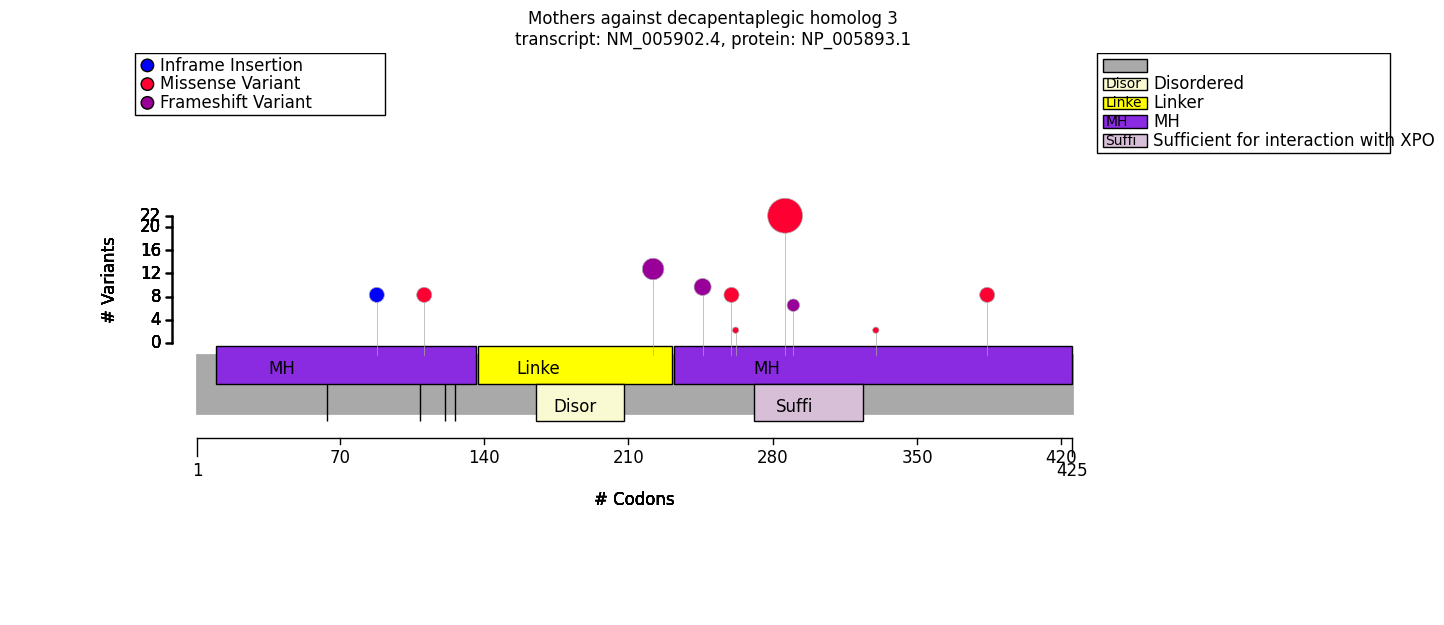

In [5]:
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import configure_default_protein_metadata_service, VVMultiCoordinateService
txc_service = VVMultiCoordinateService(genome_build=GRCh38)
pms = configure_default_protein_metadata_service()
tx_coordinates = txc_service.fetch(mane_tx_id)
protein_meta = pms.annotate(mane_protein_id)
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt
smad3_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein_diagram(
    tx_coordinates,
    protein_meta,
    cohort,
    ax=ax,
)
smad3_fig.tight_layout()

# Genotype-Phenotype Correlation (GPC) Analysis

In [6]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
analysis = configure_hpo_term_analysis(hpo)

from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest
pheno_predicates = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [7]:
from gpsea.model import VariantEffect
from gpsea.view import MtcStatsViewer
from gpsea.analysis.clf import monoallelic_classifier
from gpsea.analysis.predicate import variant_effect

missense_pred = variant_effect(VariantEffect.MISSENSE_VARIANT, mane_tx_id)
splice = variant_effect(VariantEffect.SPLICE_REGION_VARIANT, mane_tx_id)

missense_predicate = monoallelic_classifier(
    a_predicate=missense_pred,
    b_predicate=~missense_pred,
    a_label="missense",
    b_label="other"
)

missense_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=missense_predicate,
    pheno_clfs=pheno_predicates,
)

viewer = MtcStatsViewer()
viewer.process(missense_result)

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.4,9
HMF03,Skipping term because of a child term with the same individual counts,4
HMF08,Skipping general term,41
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,43


In [8]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=missense_result)

Allele group                                       missense          other  \
                                                      Count Percent  Count   
Bifid uvula [HP:0000193]                              12/26     46%   1/12   
Inguinal hernia [HP:0000023]                          11/26     42%   1/13   
Umbilical hernia [HP:0001537]                         11/26     42%   1/13   
Intervertebral disc degeneration [HP:0008419]         17/18     94%    1/2   
Osteoarthritis [HP:0002758]                           21/28     75%   5/10   
Hypertelorism [HP:0000316]                            11/25     44%   2/10   
Joint hypermobility [HP:0001382]                       7/24     29%   5/12   
Varicose veins [HP:0002619]                           12/20     60%    2/2   
Aortic aneurysm [HP:0004942]                          16/32     50%  10/16   
Arterial tortuosity [HP:0005116]                       9/19     47%    2/7   
High palate [HP:0000218]                                6/9     67%   6/11   
Arthritis [HP:0001369]                                21/21    100%    5/5   
Abnormal joint morphology [HP:0001367]                21/21    100%    5/5   
Abnormality of the vertebral column [HP:0000925]      24/24    100%    7/7   
Abnormal axial skeleton morphology [HP:0009121]       26/26    100%    7/7   
Vascular dilatation [HP:0002617]                      16/16    100%  10/10   
Abnormal blood vessel morphology [HP:0033353]         22/22    100%  10/10   
Abnormal aortic morphology [HP:0001679]               16/16    100%  10/10   
Abnormal systemic arterial morphology [HP:0011004]    19/19    100%  10/10   
Scoliosis [HP:0002650]                                14/29     48%   6/14   
Abnormal curvature of the vertebral column [HP:...    14/14    100%    6/6   
Abnormal palate morphology [HP:0000174]               17/17    100%    7/7   
Soft skin [HP:0000977]                                16/25     64%   7/12   
Abnormal elasticity of skin [HP:0010647]              17/17    100%    8/8   

Allele group                                                                   \
                                                   Percent Corrected p values   
Bifid uvula [HP:0000193]                                8%           0.268574   
Inguinal hernia [HP:0000023]                            8%           0.268574   
Umbilical hernia [HP:0001537]                           8%           0.268574   
Intervertebral disc degeneration [HP:0008419]          50%           1.000000   
Osteoarthritis [HP:0002758]                            50%           1.000000   
Hypertelorism [HP:0000316]                             20%           1.000000   
Joint hypermobility [HP:0001382]                       42%           1.000000   
Varicose veins [HP:0002619]                           100%           1.000000   
Aortic aneurysm [HP:0004942]                           62%           1.000000   
Arterial tortuosity [HP:0005116]                       29%           1.000000   
High palate [HP:0000218]                               55%           1.000000   
Arthritis [HP:0001369]                                100%           1.000000   
Abnormal joint morphology [HP:0001367]                100%           1.000000   
Abnormality of the vertebral column [HP:0000925]      100%           1.000000   
Abnormal axial skeleton morphology [HP:0009121]       100%           1.000000   
Vascular dilatation [HP:0002617]                      100%           1.000000   
Abnormal blood vessel morphology [HP:0033353]         100%           1.000000   
Abnormal aortic morphology [HP:0001679]               100%           1.000000   
Abnormal systemic arterial morphology [HP:0011004]    100%           1.000000   
Scoliosis [HP:0002650]                                 43%           1.000000   
Abnormal curvature of the vertebral column [HP:...    100%           1.000000   
Abnormal palate morphology [HP:0000174]               100%           1.000000   
Soft skin [HP:0000977]     

In [9]:
from gpsea.analysis.predicate import variant_key

arg287trp = variant_key("15_67181441_67181441_C_T") # p.Arg287Trp
arg287trp_predicate = monoallelic_classifier(
    a_predicate=arg287trp,
    b_predicate= ~arg287trp,
    a_label='p.Arg287Trp', 
    b_label='Other'
)
arg287trp_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=arg287trp_predicate,
    pheno_clfs=pheno_predicates,
)

summarize_hpo_analysis(hpo, arg287trp_result)

Allele group                                       p.Arg287Trp          Other  \
                                                         Count Percent  Count   
Osteoarthritis [HP:0002758]                              19/19    100%   7/19   
Bifid uvula [HP:0000193]                                 10/16     62%   3/22   
Inguinal hernia [HP:0000023]                              8/15     53%   4/24   
Umbilical hernia [HP:0001537]                             8/15     53%   4/24   
Varicose veins [HP:0002619]                              11/19     58%    3/3   
Intervertebral disc degeneration [HP:0008419]            16/17     94%    2/3   
Joint hypermobility [HP:0001382]                          3/14     21%   9/22   
Soft skin [HP:0000977]                                   11/15     73%  12/22   
Hypertelorism [HP:0000316]                                7/16     44%   6/19   
Aortic aneurysm [HP:0004942]                             10/21     48%  16/27   
Arterial tortuosity [HP:0005116]                          7/15     47%   4/11   
Scoliosis [HP:0002650]                                    9/18     50%  11/25   
Arthritis [HP:0001369]                                   19/19    100%    7/7   
Abnormal joint morphology [HP:0001367]                   19/19    100%    7/7   
Abnormality of the vertebral column [HP:0000925]         18/18    100%  13/13   
Abnormal axial skeleton morphology [HP:0009121]          18/18    100%  15/15   
Vascular dilatation [HP:0002617]                         10/10    100%  16/16   
Abnormal blood vessel morphology [HP:0033353]            15/15    100%  17/17   
Abnormal aortic morphology [HP:0001679]                  10/10    100%  16/16   
Abnormal systemic arterial morphology [HP:0011004]       12/12    100%  17/17   
Abnormal curvature of the vertebral column [HP:...         9/9    100%  11/11   
Abnormal palate morphology [HP:0000174]                  10/10    100%  14/14   
Abnormal elasticity of skin [HP:0010647]                 11/11    100%  14/14   

Allele group                                                                   \
                                                   Percent Corrected p values   
Osteoarthritis [HP:0002758]                            37%           0.000856   
Bifid uvula [HP:0000193]                               14%           0.051449   
Inguinal hernia [HP:0000023]                           17%           0.175724   
Umbilical hernia [HP:0001537]                          17%           0.175724   
Varicose veins [HP:0002619]                           100%           0.901719   
Intervertebral disc degeneration [HP:0008419]          67%           0.901719   
Joint hypermobility [HP:0001382]                       41%           0.901719   
Soft skin [HP:0000977]                                 55%           0.901719   
Hypertelorism [HP:0000316]                             32%           1.000000   
Aortic aneurysm [HP:0004942]                           59%           1.000000   
Arterial tortuosity [HP:0005116]                       36%           1.000000   
Scoliosis [HP:0002650]                                 44%           1.000000   
Arthritis [HP:0001369]                                100%           1.000000   
Abnormal joint morphology [HP:0001367]                100%           1.000000   
Abnormality of the vertebral column [HP:0000925]      100%           1.000000   
Abnormal axial skeleton morphology [HP:0009121]       100%           1.000000   
Vascular dilatation [HP:0002617]                      100%           1.000000   
Abnormal blood vessel morphology [HP:0033353]         100%           1.000000   
Abnormal aortic morphology [HP:0001679]               100%           1.000000   
Abnormal systemic arterial morphology [HP:0011004]    100%           1.000000   
Abnormal curvature of the vertebral column [HP:...    100%           1.000000   
Abnormal palate morphology [HP:0000174]               100%           1.000000   
Abnormal elasticity of skin [H

In [10]:
from gpsea.analysis.clf import sex_classifier

mf_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=sex_classifier(),
    pheno_clfs=pheno_predicates,
)

summarize_hpo_analysis(hpo, mf_result)

Sex                                                FEMALE           MALE  \
                                                    Count Percent  Count   
Soft skin [HP:0000977]                              12/14     86%  11/23   
Abnormal sternum morphology [HP:0000766]              0/6      0%   6/14   
Osteoarthritis [HP:0002758]                         14/17     82%  12/21   
Varicose veins [HP:0002619]                         10/13     77%    4/9   
Aortic aneurysm [HP:0004942]                        10/22     45%  16/26   
Arterial tortuosity [HP:0005116]                     8/16     50%   3/10   
High palate [HP:0000218]                              4/5     80%   8/15   
Bifid uvula [HP:0000193]                             6/15     40%   7/23   
Scoliosis [HP:0002650]                               8/19     42%  12/24   
Arthritis [HP:0001369]                              14/14    100%  12/12   
Abnormal joint morphology [HP:0001367]              14/14    100%  12/12   
Intervertebral disc degeneration [HP:0008419]       10/11     91%    8/9   
Abnormality of the vertebral column [HP:0000925]    15/15    100%  16/16   
Abnormal axial skeleton morphology [HP:0009121]     15/15    100%  18/18   
Vascular dilatation [HP:0002617]                    10/10    100%  16/16   
Abnormal blood vessel morphology [HP:0033353]       16/16    100%  16/16   
Abnormal aortic morphology [HP:0001679]             10/10    100%  16/16   
Abnormal systemic arterial morphology [HP:0011004]  13/13    100%  16/16   
Abnormal curvature of the vertebral column [HP:...    8/8    100%  12/12   
Abnormal palate morphology [HP:0000174]               9/9    100%  15/15   
Hypertelorism [HP:0000316]                           6/15     40%   7/20   
Abnormal elasticity of skin [HP:0010647]            13/13    100%  12/12   

Sex                                                                            \
                                                   Percent Corrected p values   
Soft skin [HP:0000977]                                 48%           0.780888   
Abnormal sternum morphology [HP:0000766]               43%           1.000000   
Osteoarthritis [HP:0002758]                            57%           1.000000   
Varicose veins [HP:0002619]                            44%           1.000000   
Aortic aneurysm [HP:0004942]                           62%           1.000000   
Arterial tortuosity [HP:0005116]                       30%           1.000000   
High palate [HP:0000218]                               53%           1.000000   
Bifid uvula [HP:0000193]                               30%           1.000000   
Scoliosis [HP:0002650]                                 50%           1.000000   
Arthritis [HP:0001369]                                100%           1.000000   
Abnormal joint morphology [HP:0001367]                100%           1.000000   
Intervertebral disc degeneration [HP:0008419]          89%           1.000000   
Abnormality of the vertebral column [HP:0000925]      100%           1.000000   
Abnormal axial skeleton morphology [HP:0009121]       100%           1.000000   
Vascular dilatation [HP:0002617]                      100%           1.000000   
Abnormal blood vessel morphology [HP:0033353]         100%           1.000000   
Abnormal aortic morphology [HP:0001679]               100%           1.000000   
Abnormal systemic arterial morphology [HP:0011004]    100%           1.000000   
Abnormal curvature of the vertebral column [HP:...    100%           1.000000   
Abnormal palate morphology [HP:0000174]               100%           1.000000   
Hypertelorism [HP:0000316]                             35%           1.000000   
Abnormal elasticity of skin [HP:0010647]              100%           1.000000   

Sex                                                           
                                                    p values  
Soft skin [HP:0000977]                              0.035495  
Abnormal sternum morphology [HP:0000766] 

## Summary
There was no evidence of a correlation between missense variants and specific phenotypic abnormalities. In contrast, there was
a statistically significant correlation with pArg287Trp and Osteoarthritic and Bifid uvula. The residue Arg287 is located in the 
Mad homology 2 (MH2) domain in a region that mediates interaction with exportin 4 (XPO4) ([Kurisaki A, et al.,  2006](https://pubmed.ncbi.nlm.nih.gov/16449645/)).

In [13]:
from gpseacs.report import GpseaAnalysisReport, GPAnalysisResultSummary

fet_results = (
    GPAnalysisResultSummary.from_multi(
        result=missense_result,
    ),
    GPAnalysisResultSummary.from_multi(
        result=arg287trp_result,
    ),
    GPAnalysisResultSummary.from_multi(
        result=mf_result,
    ),
)

caption = "There was no evidence of a correlation between missense variants and specific phenotypic abnormalities." "In contrast, there was a statistically significant correlation with pArg287Trp and Osteoarthritis. The residue " + "Arg287 is located in the Mad homology 2 (MH2) domain in a region that mediates interaction with exportin 4 (XPO4) (PMID16449645)."
report = GpseaAnalysisReport(name=gene_symbol, 
                             cohort=cohort, 
                             fet_results=fet_results,
                             gene_symbol=gene_symbol,
                             mane_tx_id=mane_tx_id,
                             mane_protein_id=mane_protein_id,
                             caption=caption)

In [14]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

In [16]:
summarizer.process_latex(report=report, protein_fig=smad3_fig)

Figure saved to ../../supplement/img/SMAD3_protein_diagram-draft.pdf
Output to ../../supplement/tex/SMAD3_summary_draft.tex
